In [1]:
import pandas as pd
import numpy as np

In [2]:
source = 'http://bit.ly/w-data'
data = pd.read_csv(source)

data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.nunique()

Hours     23
Scores    23
dtype: int64

##### Generating scatterplot for numeric columns in data

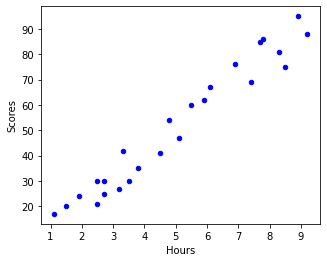

In [11]:
data.plot.scatter(x='Hours', y='Scores', figsize = (5,4), marker = 'o',color = 'blue')

In [12]:
 data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### Training And Testing The Data

In [13]:
TargetVariable = ['Scores']
Predictor = ['Hours']
X = data[Predictor].values
y = data[TargetVariable].values

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


### Machine Learning Aalgorithm 

#### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
RegModel = LinearRegression()

In [16]:
LREG=RegModel.fit(X_train,y_train)
train_prediction=LREG.predict(X_train)

print('The value of slope is: ',LREG.coef_)
print('The value of Intercept is: ',LREG.intercept_)

print('r-squared for training data',r2_score(train_prediction,y_train))
test_prediction = LREG.predict(X_test)
print('r-squared for testing data',r2_score(test_prediction,y_test))
print('Accuracy(MAPE):', 100-(np.mean(np.abs((y_test-test_prediction) / y_test)) * 100))

The value of slope is:  [[9.91065648]]
The value of Intercept is:  [2.01816004]
r-squared for training data 0.949084259502248
r-squared for testing data 0.9546785947197246
Accuracy(MAPE): 87.43110838295433


#### Equation of Simple Linear Regression Model becomes

In [17]:
import copy
data1 = copy.deepcopy(data)
predicted_scores = LREG.predict(X)
data1['Predicted_Scores'] = predicted_scores

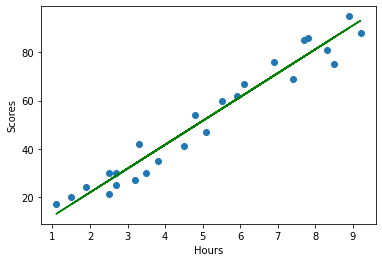

In [18]:
import matplotlib.pyplot as plt
plt.scatter(x = data['Hours'],y = data['Scores'])
plt.plot(data1['Hours'], data1['Predicted_Scores'], color = 'green')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

### KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor
Model = KNeighborsRegressor(n_neighbors=10)

KNN=Model.fit(X_train,y_train)
prediction=KNN.predict(X_test)

print('R2 Value:',r2_score(y_train, KNN.predict(X_train))) # Measuring goodness of fit in training data

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)) # Measuring Accuracy in testing data

R2 Value: 0.886830603020788
Accuracy 77.69443145810607


### Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X_standard=PredictorScalerFit.transform(X)
y_standard=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_standard, test_size=0.2, random_state=0)


#### Linear Regression (Standardized)

In [21]:
LREG=RegModel.fit(X_train,y_train)
train_prediction=LREG.predict(X_train)

print('The value of slope is: ',LREG.coef_)
print('The value of Intercept is: ',LREG.intercept_)

print('r-squared for training data',r2_score(train_prediction,y_train))
test_prediction = LREG.predict(X_test)
print('r-squared for testing data',r2_score(test_prediction,y_test))
print('Accuracy(MAPE):', 100-(np.mean(np.abs((y_test-test_prediction) / y_test)) * 100))

The value of slope is:  [[0.98965679]]
The value of Intercept is:  [0.0084909]
r-squared for training data 0.9490842595022481
r-squared for testing data 0.9546785947197246
Accuracy(MAPE): 79.41022501083505


#### KNN (Standardized)

In [22]:
from sklearn.neighbors import KNeighborsRegressor
Model = KNeighborsRegressor(n_neighbors=10)

KNN=Model.fit(X_train,y_train)
prediction=KNN.predict(X_test)

print('R2 Value:',r2_score(y_train, KNN.predict(X_train))) # Measuring goodness of fit in training data

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)) # Measuring Accuracy in testing data

R2 Value: 0.8868306030207881
Accuracy 73.94407192805946


### Normalization

In [23]:
from sklearn.preprocessing import MinMaxScaler

X = data[['Hours']]
y = data['Scores']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

norm = MinMaxScaler().fit(X_train)

X_train_norm = norm.transform(X_train)
print("Scaled Train Data: \n\n")
print(X_train_norm)

X_test_norm = norm.transform(X_test)
print("\n\nScaled Test Data: \n\n")
print(X_test_norm)

Scaled Train Data: 


[[0.33333333]
 [0.09876543]
 [0.82716049]
 [0.71604938]
 [0.        ]
 [0.49382716]
 [0.81481481]
 [0.27160494]
 [0.88888889]
 [1.        ]
 [0.61728395]
 [0.2962963 ]
 [0.19753086]
 [0.54320988]
 [0.19753086]
 [0.91358025]
 [0.17283951]
 [0.45679012]
 [0.96296296]
 [0.41975309]]


Scaled Test Data: 


[[0.04938272]
 [0.25925926]
 [0.77777778]
 [0.17283951]
 [0.59259259]]


#### Linear Regression (Standardized)

In [24]:
LREG=RegModel.fit(X_train,y_train)
train_prediction=LREG.predict(X_train)


print('r-squared for training data',r2_score(train_prediction,y_train))
test_prediction = LREG.predict(X_test)
print('r-squared for testing data',r2_score(test_prediction,y_test))
print('Accuracy(MAPE):', 100-(np.mean(np.abs((y_test-test_prediction) / y_test)) * 100))

r-squared for training data 0.949084259502248
r-squared for testing data 0.9546785947197246
Accuracy(MAPE): 87.43110838295433


#### KNN (Standardized)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
RegModel1 = KNeighborsRegressor(n_neighbors=10)

KNN=RegModel1.fit(X_train,y_train)
prediction=KNN.predict(X_test)

print('R2 Value:',r2_score(y_train, KNN.predict(X_train))) # Measuring goodness of fit in training data

print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100)) # Measuring Accuracy in testing data

R2 Value: 0.886830603020788
Accuracy 77.69443145810607
